<a href="https://colab.research.google.com/github/arpitadu/MNIST-Handwritten-Digit-Classification/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, callbacks
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model


In [3]:
print("TensorFlow version:", tf.__version__)
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

TensorFlow version: 2.15.0
GPU is available


In [52]:
#Load dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Print record counts
print(f'Number of training samples: {x_train.shape[0]}')
print(f'Number of test samples: {x_test.shape[0]}')


Number of training samples: 60000
Number of test samples: 10000


In [44]:
# Distribution of classes
unique_classes, class_counts = tf.unique(y_train)
print(f'Unique classes: {unique_classes.numpy()}')
print(f'Class counts: {class_counts.numpy()}')

Unique classes: [5 0 4 1 9 2 3 6 7 8]
Class counts: [0 1 2 ... 0 7 9]


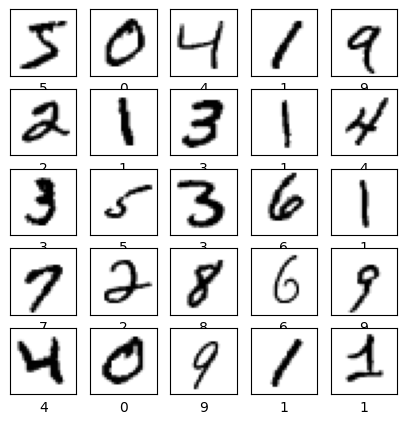

In [45]:
# Display 5 by 5 (25) sample images
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary) #cmap='gray'
    plt.xlabel(y_train[i])
plt.show()

In [53]:
#Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [47]:
x_train.shape

(60000, 28, 28)

Image size is 28 x28

In [54]:
# expand new axis, channel axis  3 or 4 dimesion needed
x_train = np.expand_dims(x_train, axis=-1)


In [55]:
print(f"x_train_resized shape: {x_train.shape}")

x_train_resized shape: (60000, 28, 28, 1)


In [56]:
#repeat for test set
x_test = np.expand_dims(x_test, axis=-1)
print(f"x_train_resized shape: {x_test.shape}")

x_train_resized shape: (10000, 28, 28, 1)


In [24]:
model = tf.keras.Sequential(

    [
        Input(shape=(28,28,1)),
        Conv2D(32, (3,3), activation='relu'),
        Conv2D(64, (3,3), activation='relu'),
        MaxPool2D(),
        BatchNormalization(),

        Conv2D(128, (3,3), activation='relu'),

        MaxPool2D(),
        BatchNormalization(),

        GlobalAvgPool2D(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2)

model.evaluate(x_test, y_test, batch_size=64)


Epoch 1/3
750/750 [==============================] - 9s 6ms/step - loss: 0.2226 - accuracy: 0.9407 - val_loss: 0.1569 - val_accuracy: 0.9526
Epoch 2/3
750/750 [==============================] - 4s 6ms/step - loss: 0.0538 - accuracy: 0.9837 - val_loss: 0.0697 - val_accuracy: 0.9791
Epoch 3/3
157/157 [==============================] - 1s 3ms/step - loss: 0.0669 - accuracy: 0.9795


[0.06686446815729141, 0.9794999957084656]

313/313 [==============================] - 1s 4ms/step - loss: 0.0669 - accuracy: 0.9795
Test accuracy: 0.9794999957084656


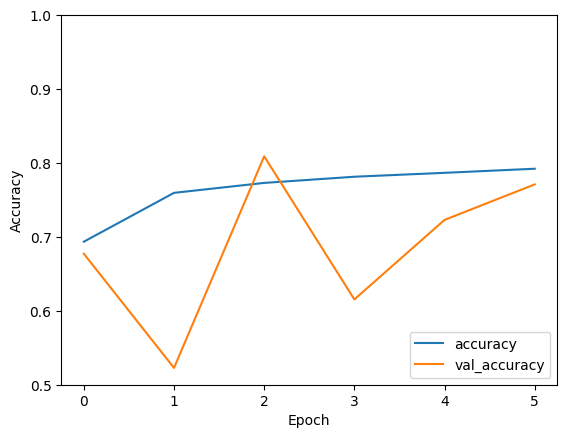

In [37]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [40]:
# Define the model architecture
model = tf.keras.Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    BatchNormalization(),

    GlobalAvgPool2D(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [67]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2,callbacks=callbacks_list)

model.evaluate(x_test, y_test, batch_size=64)

Epoch 1/20
750/750 [==============================] - 15s 14ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0478 - val_accuracy: 0.9917
Epoch 2/20
  6/750 [..............................] - ETA: 7s - loss: 3.6772e-05 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 10s 13ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0350 - val_accuracy: 0.9942
Epoch 3/20
750/750 [==============================] - 9s 12ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0327 - val_accuracy: 0.9935
Epoch 4/20
750/750 [==============================] - 9s 12ms/step - loss: 4.1541e-04 - accuracy: 0.9999 - val_loss: 0.0378 - val_accuracy: 0.9933
Epoch 5/20
750/750 [==============================] - 10s 13ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0466 - val_accuracy: 0.9907
Epoch 6/20
157/157 [==============================] - 1s 5ms/step - loss: 0.0257 - accuracy: 0.9946


[0.02566930279135704, 0.9945999979972839]

In [66]:
history.history['val_accuracy']

[0.6772000193595886,
 0.5228000283241272,
 0.8090000152587891,
 0.6154000163078308,
 0.7229999899864197,
 0.7710000276565552]

313/313 [==============================] - 1s 4ms/step - loss: 0.0257 - accuracy: 0.9946
Test accuracy: 0.9945999979972839


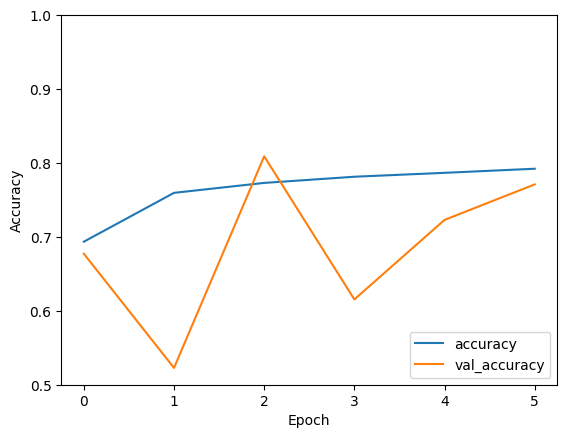

In [68]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 3ms/step


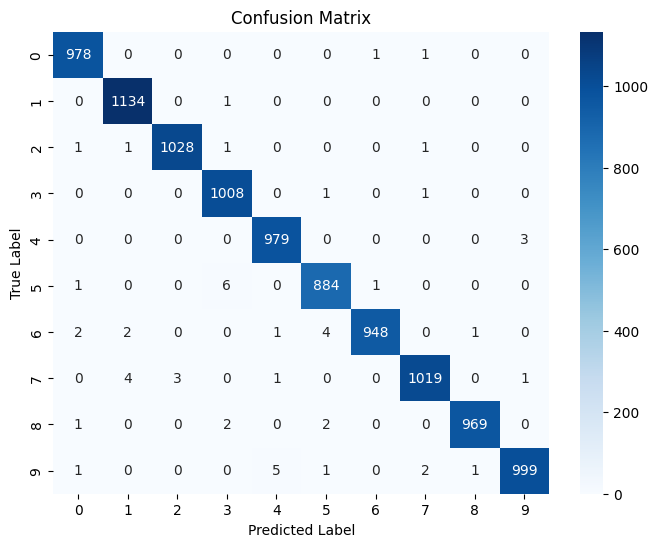

In [69]:

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns

# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Digit 0: Precision = 0.99, Recall = 1.00, F1-Score = 1.00
Digit 1: Precision = 0.99, Recall = 1.00, F1-Score = 1.00
Digit 2: Precision = 1.00, Recall = 1.00, F1-Score = 1.00
Digit 3: Precision = 0.99, Recall = 1.00, F1-Score = 0.99
Digit 4: Precision = 0.99, Recall = 1.00, F1-Score = 0.99
Digit 5: Precision = 0.99, Recall = 0.99, F1-Score = 0.99
Digit 6: Precision = 1.00, Recall = 0.99, F1-Score = 0.99
Digit 7: Precision = 1.00, Recall = 0.99, F1-Score = 0.99
Digit 8: Precision = 1.00, Recall = 0.99, F1-Score = 1.00
Digit 9: Precision = 1.00, Recall = 0.99, F1-Score = 0.99


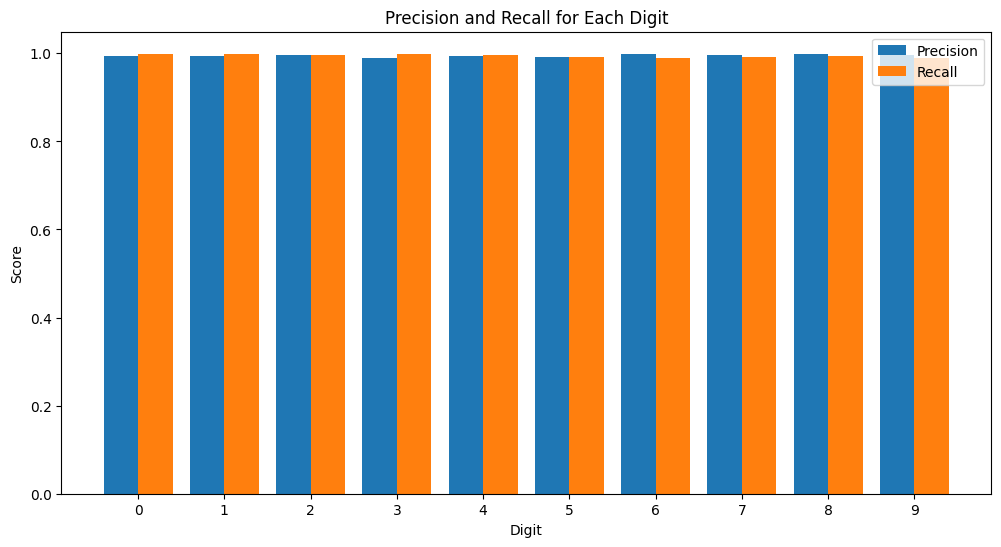

In [70]:
# Calculate precision and recall
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None, labels=np.arange(10))

# Print precision and recall for each class
for i in range(10):
    print(f"Digit {i}: Precision = {precision[i]:.2f}, Recall = {recall[i]:.2f}, F1-Score = {f1_score[i]:.2f}")

# Optionally, you can plot the precision and recall
plt.figure(figsize=(12, 6))
plt.bar(np.arange(10) - 0.2, precision, width=0.4, label='Precision')
plt.bar(np.arange(10) + 0.2, recall, width=0.4, label='Recall')
plt.xlabel('Digit')
plt.ylabel('Score')
plt.title('Precision and Recall for Each Digit')
plt.xticks(np.arange(10))
plt.legend()
plt.show()